# Skin detection

In [1]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt

# Prima foto

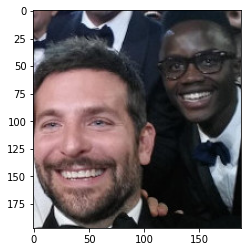

In [2]:
img = cv2.imread('images/BC.jpeg') 

RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img);

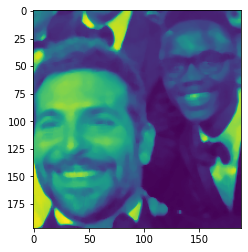

In [3]:
img = cv2.imread('images/BC.jpeg') 

img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img1 = cv2.medianBlur(img1,5)

plt.imshow(img1);

# sogliatura

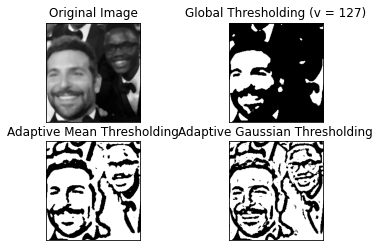

In [4]:
ret,th1 = cv2.threshold(img1,127,255,cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(img1, 255, 
                        cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)
th3 = cv2.adaptiveThreshold(img1, 255, 
                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 4)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

images = [img1, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# HSV 

In [5]:
#converting to HSV
HSV_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# define the upper and lower boundaries of the HSV pixel
# intensities to be considered 'skin'
lower = np.array([0, 36, 40],np.uint8)
upper = np.array([61, 160, 255],np.uint8)

#create skin mask
skinMaskHSV = cv2.inRange(HSV_img, lower, upper)

# blur the mask to help remove noise
skinMaskHSV = cv2.GaussianBlur(skinMaskHSV, (3, 3), 0)

#approximates the mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
skinMaskHSV = cv2.erode(skinMaskHSV, kernel, iterations =0)
skinMaskHSV = cv2.dilate(skinMaskHSV, kernel, iterations =1)

# apply the mask to the frame
HSV_skin = cv2.bitwise_not(img, mask = skinMaskHSV)
HSV_skin = cv2.bitwise_not(HSV_skin, mask = None)
HSV_skin = cv2.cvtColor(HSV_skin, cv2.COLOR_BGR2RGB)

# YCrCb

In [6]:
#set the parameters to detect skin color
lower= np.array([11, 122, 129],np.uint8)
upper= np.array([161, 155, 155],np.uint8)

#get image
YCrCb_img = cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)

#create skin mask
skinMaskYCrCb = cv2.inRange(YCrCb_img , lower, upper)

# blur the mask to help remove noise
skinMaskYCrCb = cv2.GaussianBlur(skinMaskYCrCb, (3, 3), 0)

#approximates the mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))

skinMaskYCrCb = cv2.dilate(skinMaskYCrCb, kernel, iterations = 2)
skinMaskYCrCb = cv2.erode(skinMaskYCrCb, kernel, iterations = 3)

#applies the mask to the image
YCrCb_skin = cv2.bitwise_not(img, mask = skinMaskYCrCb)
YCrCb_skin = cv2.bitwise_xor(YCrCb_skin, img, mask = None)

#convert the image into RGB
YCrCb_skin = cv2.cvtColor(YCrCb_skin, cv2.COLOR_BGR2RGB)


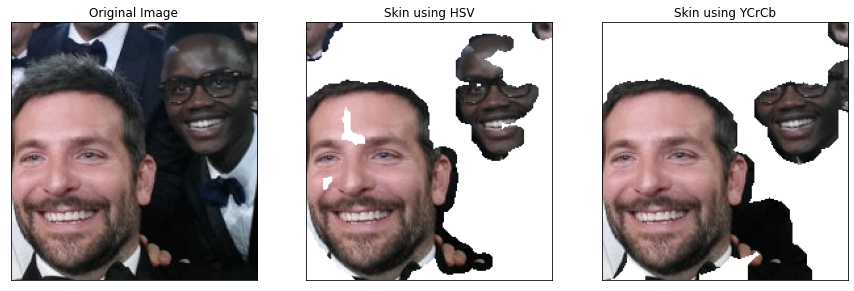

In [7]:
plt.figure(figsize=(15,5))

titles = ['Original Image', 'Skin using HSV',
            'Skin using YCrCb']

images = [RGB_img, HSV_skin, YCrCb_skin]
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Seconda foto

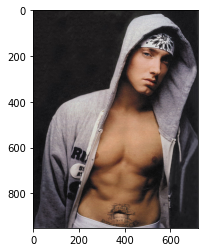

In [8]:
img2 = cv2.imread('images/Eminem.jpg') 

img1 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img1 = cv2.medianBlur(img1,5)

RGB_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(RGB_img2);

# HSV

In [9]:
#converting to HSV
HSV_img2 = cv2.cvtColor(img2 , cv2.COLOR_BGR2HSV)

# define the upper and lower boundaries of the HSV pixel
# intensities to be considered 'skin'
lower = np.array([0, 46, 40],np.uint8)
upper = np.array([61, 180, 220],np.uint8)

#create skin mask
skinMaskHSV2 = cv2.inRange(HSV_img2, lower, upper)

# blur the mask to help remove noise
skinMaskHSV2 = cv2.GaussianBlur(skinMaskHSV2, (3, 3), 0)

#approximates the mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
skinMaskHSV2 = cv2.erode(skinMaskHSV2, kernel, iterations =1)
skinMaskHSV2 = cv2.dilate(skinMaskHSV2, kernel, iterations =1)

# apply the mask to the frame
HSV_skin2 = cv2.bitwise_not(img2 , mask = skinMaskHSV2)
HSV_skin2 = cv2.bitwise_not(HSV_skin2, mask = None)
HSV_skin2 = cv2.cvtColor(HSV_skin2, cv2.COLOR_BGR2RGB)

# YCrCb

In [10]:
#set the parameters to detect skin color
lower= np.array([11, 100, 124],np.uint8)
upper= np.array([255, 173, 145],np.uint8)

#get image
YCrCb_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2YCR_CB)

#create skin mask
skinMaskYCrCb2 = cv2.inRange(YCrCb_img2 , lower, upper)

# blur the mask to help remove noise
skinMaskYCrCb2 = cv2.GaussianBlur(skinMaskYCrCb2, (3, 3), 0)

#approximates the mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))

skinMaskYCrCb2 = cv2.erode(skinMaskYCrCb2, kernel, iterations = 1)
skinMaskYCrCb2 = cv2.dilate(skinMaskYCrCb2, kernel, iterations = 1)

#applies the mask to the image
YCrCb_skin2 = cv2.bitwise_not(img2, mask = skinMaskYCrCb2)
YCrCb_skin2 = cv2.bitwise_xor(YCrCb_skin2, img2, mask = None)

#convert the image into RGB
YCrCb_skin2 = cv2.cvtColor(YCrCb_skin2, cv2.COLOR_BGR2RGB)

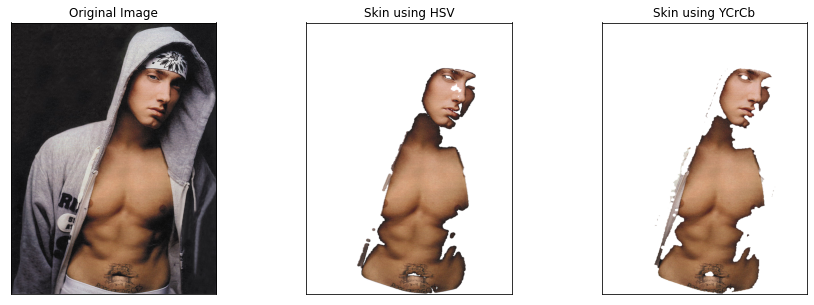

In [11]:
plt.figure(figsize=(15,5))

titles = ['Original Image', 'Skin using HSV',
            'Skin using YCrCb']

images = [RGB_img2, HSV_skin2, YCrCb_skin2]
for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Calcolo della media

### dei valori RGB prese un'insieme di immagini raffiguranti la pelle in diverse tonalità

In [12]:
image_bgr = cv2.imread('images/pelle/pelle1.jpg', cv2.IMREAD_COLOR)
channels1 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle2.jpg', cv2.IMREAD_COLOR)
channels2 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle3.jpg', cv2.IMREAD_COLOR)
channels3 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle4.jpg', cv2.IMREAD_COLOR)
channels4 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle5.jpg', cv2.IMREAD_COLOR)
channels5 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle6.jpg', cv2.IMREAD_COLOR)
channels6 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle7.jpg', cv2.IMREAD_COLOR)
channels7 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle8.jpg', cv2.IMREAD_COLOR)
channels8 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle9.jpg', cv2.IMREAD_COLOR)
channels9 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/pelle/pelle10.jpg', cv2.IMREAD_COLOR)
channels10 = cv2.mean(image_bgr)

print("creo un array con i valori rgb medi di 10 immagini riffiguranti diverse tonalità di pelle")
arrayR = np.array([channels1[2],channels2[2],channels3[2],channels4[2],channels5[2],channels6[2],channels7[2],channels8[2],channels9[2],channels10[2]])
arrayG = np.array([channels1[1],channels2[1],channels3[1],channels4[1],channels5[1],channels6[1],channels7[1],channels8[1],channels9[1],channels10[1]])
arrayB = np.array([channels1[0],channels2[0],channels3[0],channels4[0],channels5[0],channels6[0],channels7[0],channels8[0],channels9[0],channels10[0]])


creo un array con i valori rgb medi di 10 immagini riffiguranti diverse tonalità di pelle


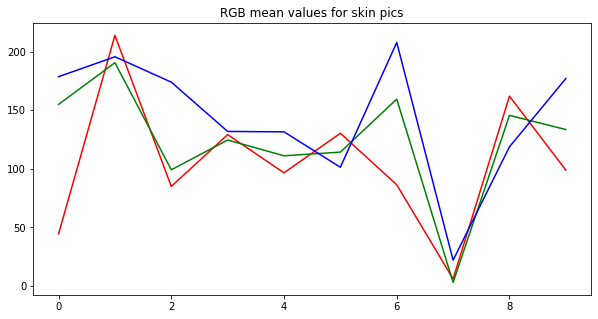

In [16]:
plt.figure(figsize=(10, 5))
plt.title('RGB mean values for skin pics',fontsize=12)

plt.plot(arrayR, color = 'r')
plt.plot(arrayG, color = 'g')
plt.plot(arrayB, color = 'b')
plt.show()

In [14]:
image_bgr = cv2.imread('images/nopelle/sweat1.jpg', cv2.IMREAD_COLOR)
channels1 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat2.jpg', cv2.IMREAD_COLOR)
channels2 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat3.jpg', cv2.IMREAD_COLOR)
channels3 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat4.jpg', cv2.IMREAD_COLOR)
channels4 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat5.jpg', cv2.IMREAD_COLOR)
channels5 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat6.jpg', cv2.IMREAD_COLOR)
channels6 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat7.jpg', cv2.IMREAD_COLOR)
channels7 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat8.jpg', cv2.IMREAD_COLOR)
channels8 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat9.jpg', cv2.IMREAD_COLOR)
channels9 = cv2.mean(image_bgr)

image_bgr = cv2.imread('images/nopelle/sweat10.jpg', cv2.IMREAD_COLOR)
channels10 = cv2.mean(image_bgr)

print("creo un array con i valori rgb medi di 10 immagini diverse dalla pelle")
arrayR = np.array([channels1[2],channels2[2],channels3[2],channels4[2],channels5[2],channels6[2],channels7[2],channels8[2],channels9[2],channels10[2]])
arrayG = np.array([channels1[1],channels2[1],channels3[1],channels4[1],channels5[1],channels6[1],channels7[1],channels8[1],channels9[1],channels10[1]])
arrayB = np.array([channels1[0],channels2[0],channels3[0],channels4[0],channels5[0],channels6[0],channels7[0],channels8[0],channels9[0],channels10[0]])


creo un array con i valori rgb medi di 10 immagini diverse dalla pelle


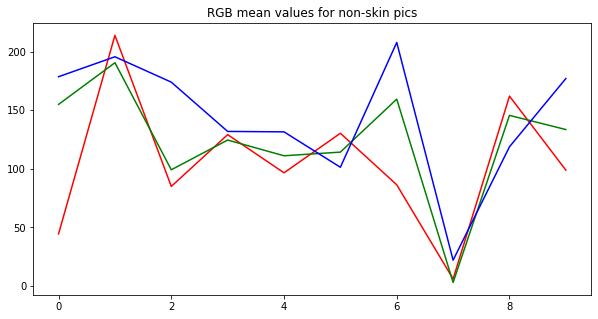

In [17]:
plt.figure(figsize=(10, 5))
plt.title('RGB mean values for non-skin pics',fontsize=12)

plt.plot(arrayR, color = 'r')
plt.plot(arrayG, color = 'g')
plt.plot(arrayB, color = 'b')
plt.show()

C'è sempre proporzione nelle quantità di r g e b della foto quando la foto è pelle e altrimenti no.

Quando abbiamo una foto possiamo dire che è pelle quando il valore di r è maggiore degli altri e di g è compreso tra i due... in questo modo andranno a formare un colore sempre vicino a quello della pelle desiderato.

Anche se non è accurata come cosa per dire se una foto raffigura della pelle o no basta guardare i valori medi, se R>G>B diciamo che è pelle, altrimenti no.